# Abalone Age Prediction

In [1]:
import pandas as pd
from sklearn import metrics

## Dataset

In [2]:
file_path = './data/abalone.csv'
df = pd.read_csv(file_path)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df['Age'] = df['Rings'] + 1.5
df = df.drop(['Rings'], axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## Data Analysis

In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [6]:
# Get the shape of the data
df.shape

(4177, 9)

In [7]:
# Get the column names
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [8]:
# Count missing values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [9]:
# Select duplicated rows
df[df.duplicated()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age


Seems like there is no duplicated data

In [10]:
# Select categorical data, numerical data
categorical_data = df.select_dtypes(['object'])
numerical_data = df.select_dtypes(['float64', 'int64'])

categorical_data.head(), numerical_data.head()

(  Sex
 0   M
 1   M
 2   F
 3   M
 4   I,
    Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
 0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
 1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
 2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
 3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
 4   0.330     0.255   0.080        0.2050          0.0895          0.0395   
 
    Shell weight   Age  
 0         0.150  16.5  
 1         0.070   8.5  
 2         0.210  10.5  
 3         0.155  11.5  
 4         0.055   8.5  )

In [11]:
df['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

## Data visualization

(1.0999999999999999, 31.9, 0.0, 1730.4)

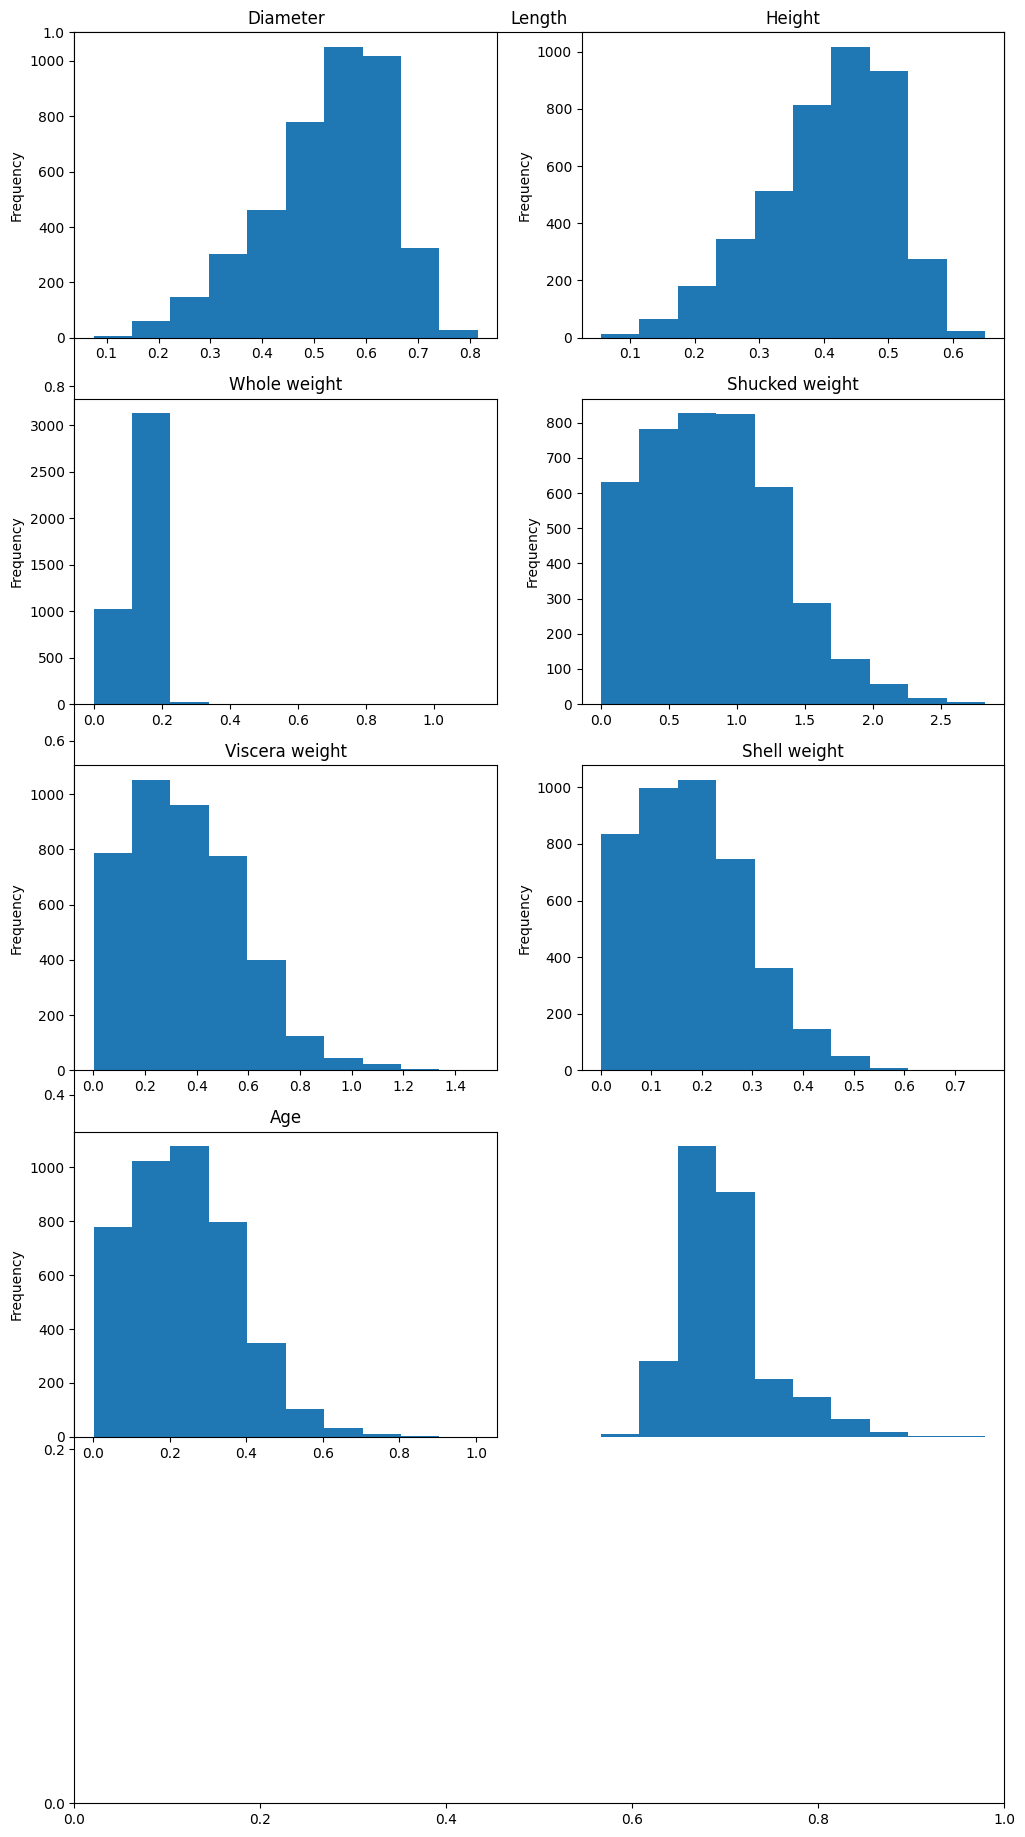

In [12]:
import matplotlib.pyplot as plt
# Plot age
plt.figure(figsize=(12, 23))
for i, col in enumerate(numerical_data):
  plt.title(col, fontsize=12)
  ax = plt.subplot(5, 2, i+1)
  if col == 'Sex':
    df[col].value_counts().plot.bar()
  else:
    df[col].plot.hist()
plt.axis(False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8474ca020>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8474ab490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8474c9d80>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8474ca3b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d8474ca5f0>],
 'means': []}

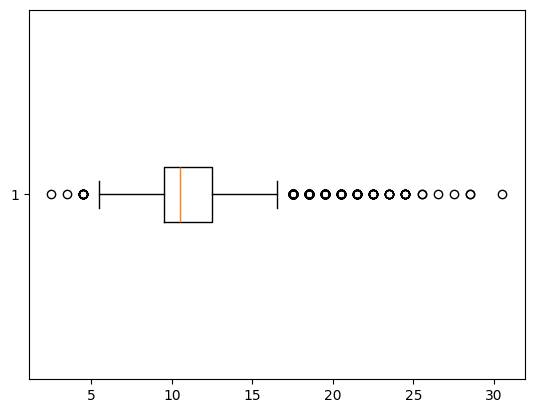

In [13]:
plt.boxplot(df['Age'], vert=False)

## Feature Correlation

In [14]:
pearson_corr = df.corr('pearson', numeric_only=True)
pearson_corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<Axes: >

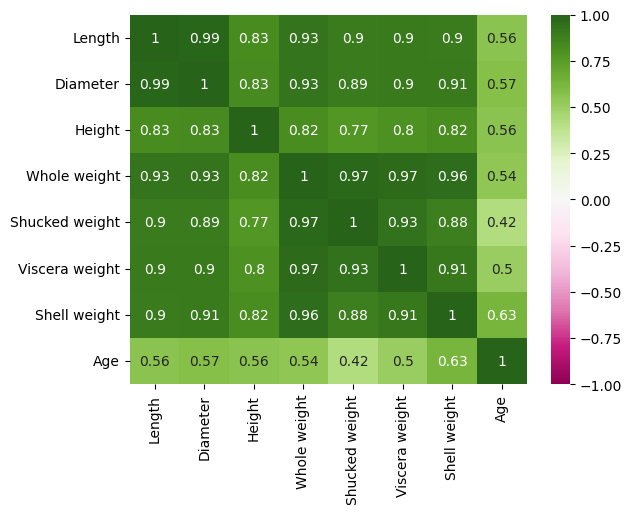

In [15]:
import seaborn as sns

sns.heatmap(pearson_corr, cmap='PiYG', annot=True, vmax=1, vmin=-1)

## Cleaning Data

In [16]:
import numpy as np
def remove_outliers(df: pd.DataFrame):
  numerical_df = df.select_dtypes(include=np.number)
  Q1 = numerical_df.quantile(0.25)
  Q3 = numerical_df.quantile(0.75)
  IQR = Q3 - Q1
  
  outlier = ((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)
  return df[~outlier]

df = remove_outliers(df)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


{'whiskers': [<matplotlib.lines.Line2D at 0x1d847d125f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d847d12b30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d847d12350>],
 'medians': [<matplotlib.lines.Line2D at 0x1d847d13070>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d847d13310>],
 'means': []}

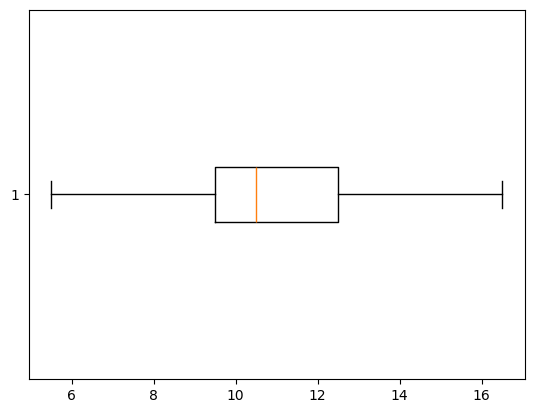

In [17]:
plt.boxplot(df['Age'], vert=False)

## Data Encoding

In [18]:
df['Sex'].head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [19]:
df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1, 'I': 2})

df.head()

C:\Users\kratt\AppData\Local\Temp\ipykernel_4264\1718764929.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1, 'I': 2})


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [20]:
df.shape

(3781, 9)

In [21]:
numerical_data.shape

(4177, 8)

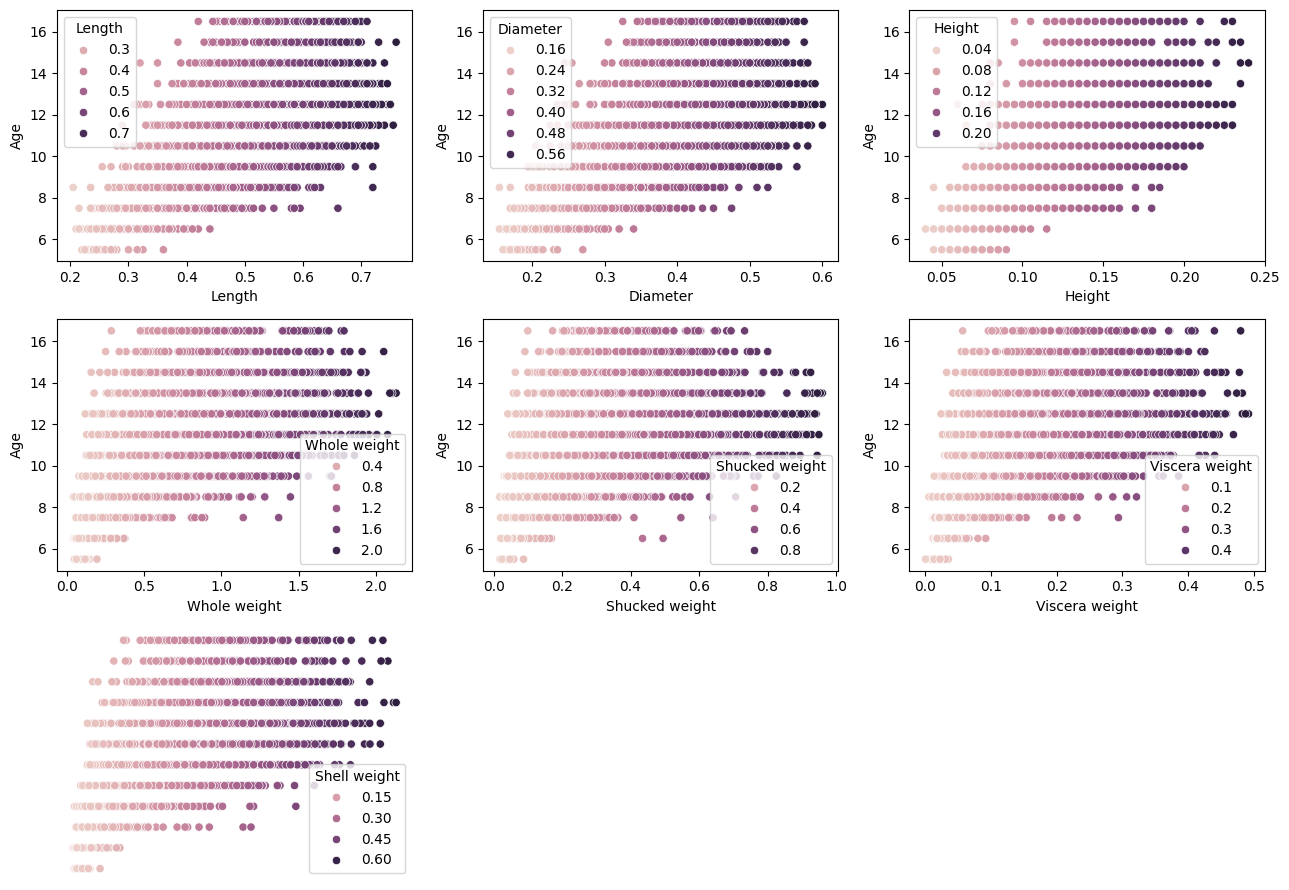

In [22]:
plt.figure(figsize=(13, 9))

target='Age'

for i, col in enumerate(numerical_data):
  if(col != target):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(df, x=col, y=target, hue=col)
    

plt.axis("off")
plt.tight_layout()

## Building Model

### Splitting data

In [23]:
from sklearn.model_selection import train_test_split
# Splitting data
train_data, test_data = train_test_split(df, random_state=42, test_size=0.25)

# Change datatype to float32
train_data, test_data = train_data.astype('float32'), test_data.astype('float32')
len(train_data), len(test_data)

(2835, 946)

#### Preparing data for model

In [24]:
input_features = df.drop(columns=['Age'])
target_feature = df['Age']

input_features, target_feature

(      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
 0       0   0.455     0.365   0.095        0.5140          0.2245   
 1       0   0.350     0.265   0.090        0.2255          0.0995   
 2       1   0.530     0.420   0.135        0.6770          0.2565   
 3       0   0.440     0.365   0.125        0.5160          0.2155   
 4       2   0.330     0.255   0.080        0.2050          0.0895   
 ...   ...     ...       ...     ...           ...             ...   
 4172    1   0.565     0.450   0.165        0.8870          0.3700   
 4173    0   0.590     0.440   0.135        0.9660          0.4390   
 4174    0   0.600     0.475   0.205        1.1760          0.5255   
 4175    1   0.625     0.485   0.150        1.0945          0.5310   
 4176    0   0.710     0.555   0.195        1.9485          0.9455   
 
       Viscera weight  Shell weight  
 0             0.1010        0.1500  
 1             0.0485        0.0700  
 2             0.1415        0.2100  
 3    

In [25]:
X_train, X_test, y_train, y_test = train_test_split(input_features, target_feature, test_size=0.25)

# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
# y_train = y_train.astype('float32')
# y_test = y_test.astype('float32')

### Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [34]:
# Train the model
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [35]:
# Make predictions on the test set
y_pred = gbr.predict(X_test)

In [36]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2.5047395961779326
R^2 Score: 0.5411974832117954


In [37]:
# Feature Importance Plot
def plot_feature_importance(model, X_train):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + 0.5
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(pos, feature_importance[sorted_idx], align='center')
    ax.set_yticks(pos)
    ax.set_yticklabels(np.array(X_train.columns)[sorted_idx])
    ax.set_xlabel('Feature Importance')
    ax.set_title('Feature Importance (Gradient Boosting)')
    plt.show()

# Prediction vs Actual Plot
def plot_prediction_vs_actual(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    sns.lineplot(x=y_test, y=y_test, color='red')
    plt.xlabel('Actual Rings')
    plt.ylabel('Predicted Rings')
    plt.title('Actual vs Predicted Rings')
    plt.show()

# Residual Plot
def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.hlines(0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
    plt.xlabel('Predicted Rings')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

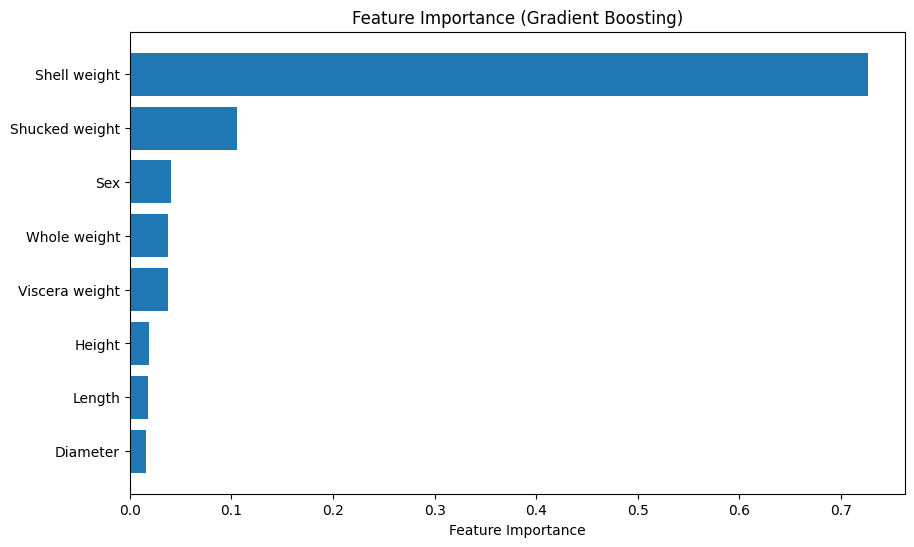

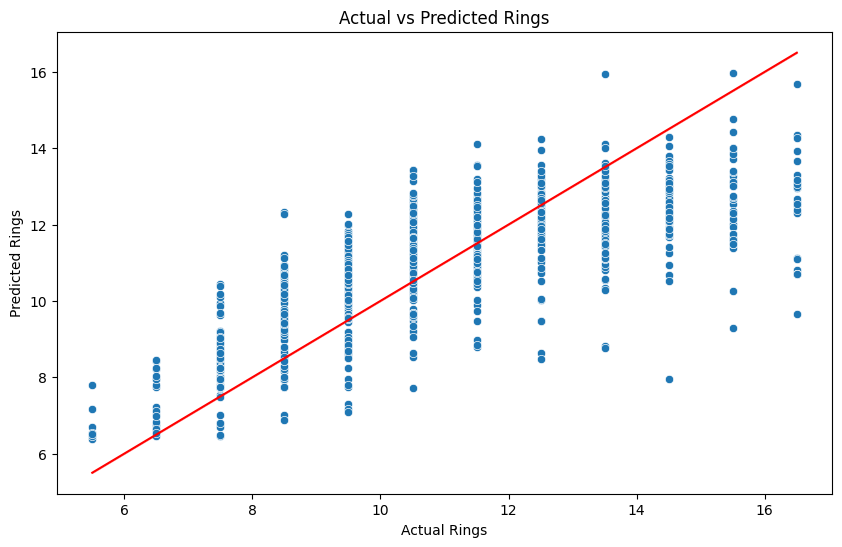

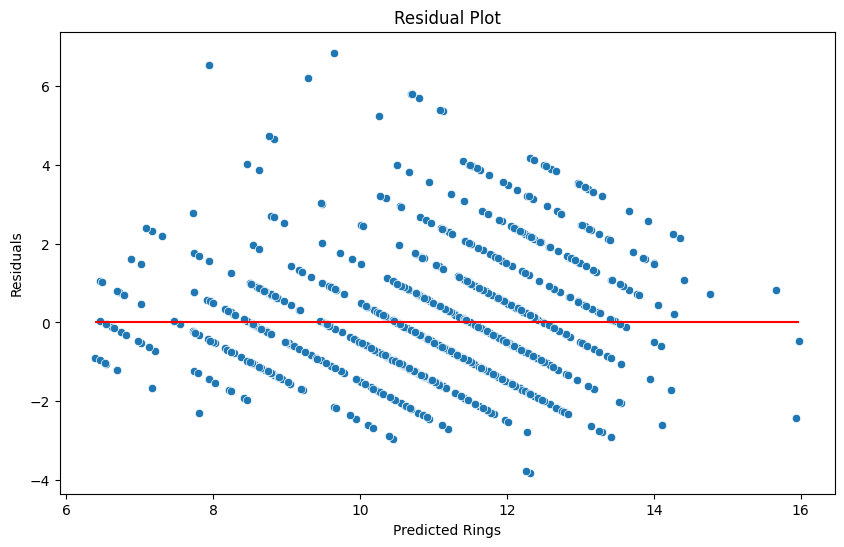

In [38]:
# Call the plotting functions
plot_feature_importance(gbr, X_train)
plot_prediction_vs_actual(y_test, y_pred)
plot_residuals(y_test, y_pred)